# Atividade 01

*Pedro Henrique Silva Domingues*

---

## Bibliotecas

In [1]:
# Std. Lib
from random import randint

# 3rd Party
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Classes

In [2]:
class InvalidDiceException(Exception):
    def __init__(self, *args) -> None:
        super().__init__(*args)

class Dice:
    """Dice class to simulate a dice roll. Unlike a real dice, this can have any number of sides from 2 to n"""
    def __init__(self, sides:np.uint64) -> None:
        # Verifying if the dice is valid
        if sides < 1:
            raise InvalidDiceException('Dice can\'t have less than 1 side')
        self.sides = sides # Number of sides in the dice
        self.roll = lambda: randint(1, self.sides) # Public method to roll the dice

## Parâmetros

In [3]:
NDICES = 2 # Number of dices used in the experiment
SIDES = 6 # Number of sides in each dice
NROLLS = 1000 # Number of rolls for each dice

## Geração dos resultados

In [4]:
# Instance all dices
dices = [Dice(SIDES) for _ in range(NDICES)]
# Roll the dice NROLLS times and store the results as a dataframe
roll_df = pd.DataFrame([{f'Dice{i}': dices[i].roll() for i in range(NDICES)} for _ in range(NROLLS)])
# Generate a sum column for the total sum of the dices in each roll
roll_df['sum'] = roll_df.sum(axis=1)

## Visualização dos resultados

In [5]:
# === This cell contain visualization for 
# Generating a table (numpy matrix) containing the count of each possible pair of occurrences for the 2 dice
roll_table = np.histogram2d(
    roll_df['Dice0'], # X
    roll_df['Dice1'], # Y
    bins=[range(1,SIDES+2)]*NDICES, # Bin values as [min, max[ -- max[ is the reason for the +2 instead of +1
    range=[(1,SIDES) for _ in range(NDICES)] # range of each bin [min, max]
)[0].astype(np.uint64) # Table is in index 0, cast all values from float to unsigned int

# Cloning the table and normalizing the values
roll_table_normed = roll_table/NROLLS

# Converting the table to a dataframe
roll_table_normed_df = pd.DataFrame(roll_table_normed, columns=range(1,7), index=pd.Index(range(1,7)))

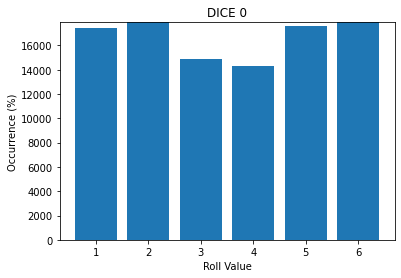

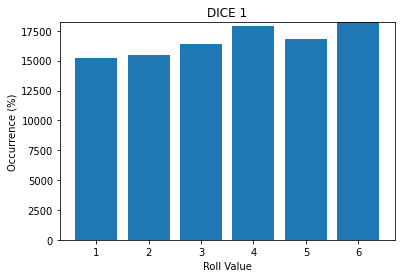

In [6]:
# Visualizing the histogram of each dice separately, works with n dice
for dice_idx in range(NDICES):
    # Calculate the sum of occurrences for each value in the dice
    occurrences = roll_df[f'Dice{dice_idx}'].value_counts().sort_index().reindex(range(1,SIDES+1), fill_value=0)
    # Convert to percentage (0~100)
    occurrences*=100
    # Plot as a histogram
    plt.bar(range(1,SIDES+1), occurrences)
    plt.ylim(0,max(occurrences)+5)
    plt.xticks(range(1,SIDES+1))
    plt.title(f"DICE {dice_idx}")
    plt.ylabel('Occurrence (%)')
    plt.xlabel('Roll Value')
    plt.show()

Como é possível notar nos gráficos a cima, a distribuição de probabilidade é uniforme entre os valores dos dados, replicando o comportamento de um dado real.

### Tabela de combinações (% 0~1) em cores

In [7]:
# === This snippet to generate a colored table displaying the results was addapted from
# https://stackoverflow.com/questions/44971502/what-code-for-a-table-with-colors-instead-of-values
from matplotlib import colors
def background_gradient(s, m, M, cmap='PuBu', low=0, high=0):
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return [f'background-color: {color}' for color in c]

roll_table_normed_df.style.apply(background_gradient,
               cmap='RdYlGn',
               m=roll_table_normed_df.min().min(),
               M=roll_table_normed_df.max().max(),
               low=roll_table_normed_df.min().min(),
               high=roll_table_normed_df.max().max())

,1,2,3,4,5,6
1,0.026000,0.024000,0.029000,0.035000,0.033000,0.027000
2,0.030000,0.018000,0.031000,0.030000,0.038000,0.032000
3,0.021000,0.026000,0.024000,0.025000,0.020000,0.033000
4,0.025000,0.028000,0.022000,0.021000,0.020000,0.027000
5,0.021000,0.031000,0.030000,0.034000,0.030000,0.030000
6,0.029000,0.028000,0.028000,0.034000,0.027000,0.033000


A tabela a cima mostra a probabilidade de ocorrencia de todas as combinações possíveis para os dois dados, com as colunas indicando o valor de um dado e as linhas do outro.

A partir deste resultado conseguimos perceber que todas as combinações possuem probabilidades de ocorrencia muito próxima, com a diferença entre a máxima e mínima sendo apenas de `3.8 - 1.6 = 2.2%`.

### Verificando a soma dos dados

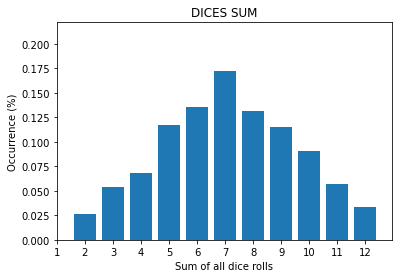

In [8]:
count, idx = np.histogram(roll_df['sum'], bins=range(2,SIDES*2+2))
idx = idx[:-1] # histogram will always return 1 more index representing bins with greater value, we don't need it
count = count.astype(np.int64) / sum(count)

plt.bar(idx, count)
plt.ylim(0,max(count)+0.05)
plt.xticks(range(1,SIDES*2+1))
plt.title(f"DICES SUM")
plt.ylabel('Occurrence (%)')
plt.xlabel('Sum of all dice rolls')
plt.show()

Observando a soma dos dois dados notamos um comportamento diferente do anterior, agora os resultados deixam de apresentar uma distribuição uniforme e passam o ter comportamento de uma curva normal, com 7 sendo o valor mais provável e 2/12 sendo os valores menos prováveis. 

Isto ocorreu devido a probabilidade de cada resultado ser diretamente proporcional ao número de combinações que resultam neste valor. 

Como existem `6*6 = 36` possíveis combinações (considerando que combinações como 3/5 e 5/3 são diferentes), podemos deduzir que:

- Os valores 2 e 12 possuem apenas uma combinação possivel cada, 1/1 e 6/6 respectivamente, portanto suas probabilidades são de `1/36=2.77%` (valor próximo aos obtidos experimentalmente de `2.6%` e `3.3%`);
- O valor 7 possui o maior número de combinações possíveis (6), sendo essas equivalentes aos elementos da diagonal secundária da matriz apresentada a cima. Portando sua probabilidade é de `6/36=16.66%`, próxima a obtida experimentalmente de `2,7+3,8+2,5+2,2+3,1+2,9 = 17.2%`